In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import MDAnalysis.transformations as trans
from MDAnalysis.analysis.rms import RMSF

import matplotlib.pyplot as plt

import pandas as pd

/home/media/data2/user_home/dbsejrgus226/miniconda3/envs/MD/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
md_universe = mda.Universe(str("./240905_Final_topology_50ns_PME_2.pdb"), str("./20240905_transformed_trajectory_rank2_2.xtc"))

/home/media/data2/user_home/dbsejrgus226/miniconda3/envs/MD/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:287: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "


In [3]:
protein = md_universe.select_atoms("protein")

In [4]:
prealigner = align.AlignTraj(md_universe, md_universe, select="protein and name CA",
                             in_memory=True).run()

In [5]:
# 3) reference = average structure
reference_coordinates = md_universe.trajectory.timeseries(asel=protein).mean(axis=1)
# make a reference structure (need to reshape into a 1-frame "trajectory")
reference = mda.Merge(protein).load_new(
    reference_coordinates[:, None, :], order="afc")

In [6]:
aligner = align.AlignTraj(md_universe, reference, select="protein and name CA", in_memory=True).run()

In [7]:
calphas = protein.select_atoms("name CA")
rmsfer = RMSF(calphas, verbose=True).run()

  0%|          | 0/500 [00:00<?, ?it/s]

/home/media/data2/user_home/dbsejrgus226/miniconda3/envs/MD/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


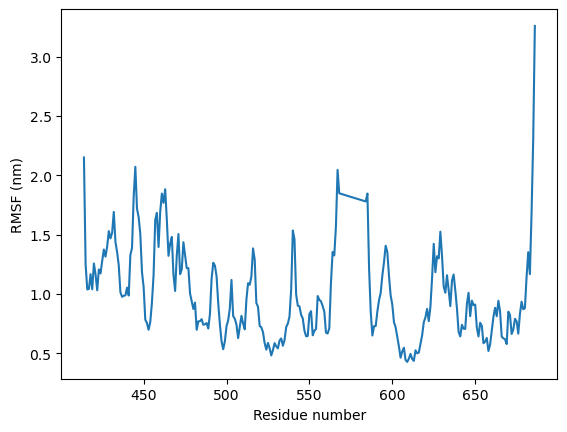

In [8]:
plt.plot(calphas.resnums, rmsfer.rmsf)
plt.xlabel("Residue number")
plt.ylabel("RMSF (nm)")
plt.savefig("20240924_rank2_rmsf_results.png")

In [9]:
rank1_rmsf_df = pd.DataFrame({"residue": calphas.resnums, "rmsf": rmsfer.rmsf})
rank1_rmsf_df.head()
rank1_rmsf_df.to_csv("20240924_rank2_rmsf_results.csv")